In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.utils.multiclass import unique_labels


from tests import train_test_split_kfold_resample, train_test_split_intime_resample
from tests import train_test_split_intime_adasyn, train_test_split_intime_smote
from tests import test_pdf_representation, test_intime_pdf_representation

from plot import plot_confusion_matrix_a
from resample import resample_df
from _pdf_representation import ToPdfRepresentation

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
from rede.rede import NeuralNet

In [3]:
df_train = pd.read_pickle('data_train.pkl')
df_test = pd.read_pickle('data_test.pkl')

In [4]:
target = 'discretize_s4'
predictors = [i for i in df_train.columns if i != target]

In [5]:
precision = make_scorer(precision_score, average='macro')
score_function = accuracy_score

In [6]:
def test_intime_pdf_representation(df_train, df_test,
                                   split, mod, score_function,
                                   predictors, target):

    X_train, y_train, X_test, y_test = split(df_train,
                                             df_test,
                                             predictors,
                                             target)

    # generate minmax transformation for (x,y)
    # transformation for X
    X_scaler = MinMaxScaler(feature_range=(0.05, 0.95))
    X_scaler.fit(X_train)
    X_train = X_scaler.transform(X_train)


    # generate pdf representation for the train data
    to_pdf = ToPdfRepresentation(16, 1, target)
    to_pdf.fit(X_train, y_train)
    X_train = to_pdf.transform(X_train)
    
    # get the predictors after generate pdf representation
    # then extract the data from the df_aux_1 dataframe
    # generate pdf representation to test data
    X_test = X_scaler.transform(X_test)
    X_test = to_pdf.transform(X_test)
    
    print("Número de amostras da classe 1.0: {}".format(y_train[y_train == 1.0].shape[0]))
    print("Número de amostras da classe 0.0: {}".format(y_train[y_train == 0.0].shape[0]))
    # fit the model to the train data
    validation_data = (X_test, y_test)
    mod.fit(X_train, y_train, validation_data)
    
    # make the prediction to X_test
    predict = mod.predict(X_test)

    plot_confusion_matrix_a(y_test,
                            predict,
                            classes=['NS', 'S'],
                            title='Matriz de Confusão')

    score = score_function(y_true=y_test,
                           y_pred=predict)
    loss = 1 - score
    print(loss)

  0%|          | 0/2000 [00:00<?, ?it/s]

Número de amostras da classe 1.0: 1061
Número de amostras da classe 0.0: 1051


100%|██████████| 2000/2000 [57:21<00:00,  1.53s/it]


0.37254901960784315


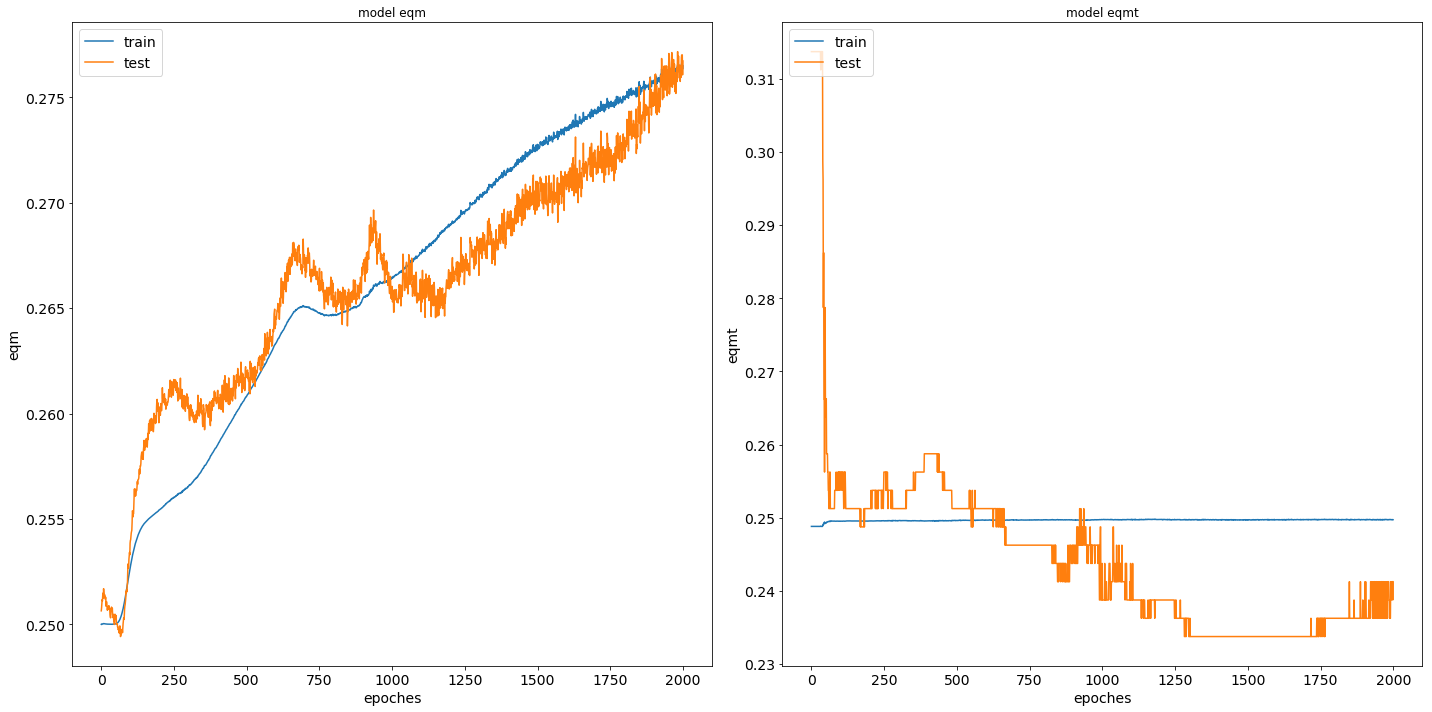

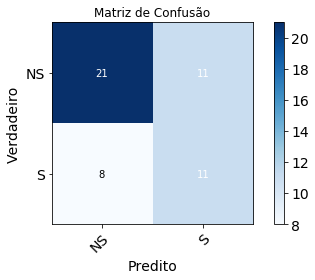

In [7]:
mlp = NeuralNet()

test_intime_pdf_representation(df_train,
                               df_test,
                               train_test_split_intime_adasyn,
                               mlp,
                               score_function,
                               predictors,
                               target)